# Imports

In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import pandas as pd
import Test_Functions
import matplotlib.pyplot as plt

importing Jupyter notebook from Test_Functions.ipynb


# Fetching a List of Dates to Simulate
Here we will fetch the date list for thefirst half of the 2018 season and we will simulate how our model would perform over the course of the season. 

In [2]:
box_df = pd.read_csv("outputs/NBABoxStats.csv")
dates = box_df['Date'].to_numpy()
dates = Test_Functions.get_dates_list(dates)
index = dates.index('2018-10-28')
end_index = dates.index('2018-12-25')
date_list = dates[index:end_index]

# Running Season Simulation
We call test_season() with a starting balance of 1000 and placing bets of 100 each week. test_season() works by calling get_lines() which will scrape rotoguru.com for average points needed each day to place in gpp contest and cash contests (ie. points needed to place in tournaments and points needed to place in 50/50s). Then test_season() will execute a streamlined copy of the modeling notebook to generate predictions, then it will execute the lineup creation notebook which generates the 20 optimal lineups for that day's predictions. test_season() then calculates the proportion of lineups that would cash and determines how much money would be won or lost. Finally test_season() returns an array of the current balance.  

In [3]:
money_arr, cash_lines = Test_Functions.test_season(5000, 100, date_list, 5, 3)

100%|██████████| 56/56 [19:29<00:00, 20.88s/Dates]


1


100%|██████████| 56/56 [19:10<00:00, 20.54s/Dates]


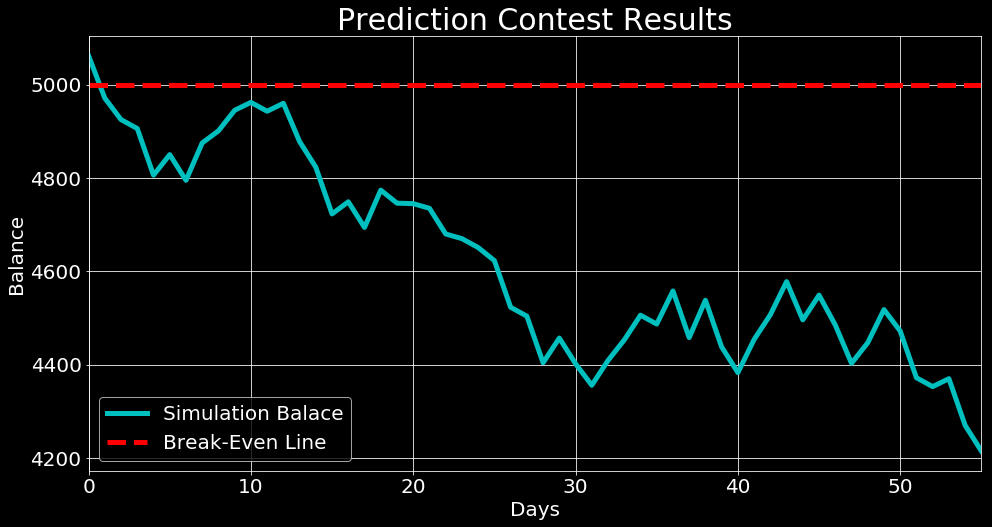

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.plot(money_arr, color='c', linewidth=5, label = "Simulation Balace")
plt.plot([0, len(money_arr)], [5000, 5000], color='r', linestyle='--', linewidth=5, 
        label = "Break-Even Line")
plt.grid()
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Balance', fontsize = 20)
plt.title('Prediction Contest Results', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, len(money_arr)-1)
plt.legend(fontsize=20)
plt.show()